<a href="https://colab.research.google.com/github/Lavya-Thapar/Car-Price-Prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#loading the dataset
dataset=pd.read_excel('car_dataset.xlsx')

In [4]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#no null values, good to go
print(dataset.Fuel_Type.value_counts())
print(dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
#encoding the categorical attributes
#for Fuel_Type column
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
#split into training data and target label
X=dataset.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=dataset['Selling_Price']

In [12]:
X.head()


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [13]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [15]:
#splitting into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [17]:
#loading the linear regression model, model means linera reg model
model=LinearRegression()

In [18]:
model.fit(X_train,Y_train)

LinearRegression()

In [19]:
#model evaluation
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)
train_error=metrics.r2_score(pred_train,Y_train)
test_error=metrics.r2_score(pred_test,Y_test)
print('tarining error: ',train_error)
print('testing error: ',test_error)

tarining error:  0.8635655509198777
testing error:  0.8062199941176358


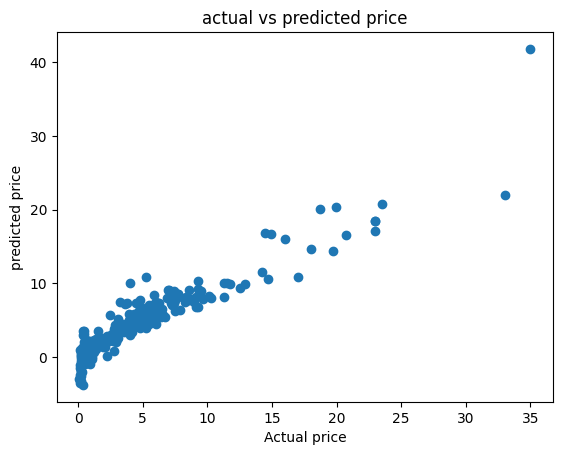

In [20]:
#visualisation of training accuracy
plt.scatter(Y_train,pred_train)
plt.xlabel('Actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()


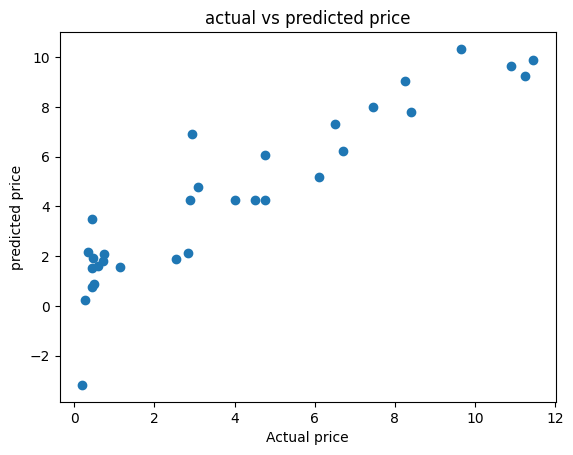

In [21]:
#visualisation of testing accuracy
plt.scatter(Y_test,pred_test)
plt.xlabel('Actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()

In [24]:
#repeating the same stpes with Lasso Model
model_2=Lasso()
model_2.fit(X_train,Y_train)
pred_train_lasso=model_2.predict(X_train)
pred_test_lasso=model_2.predict(X_test)
train_error_lasso=metrics.r2_score(pred_train_lasso,Y_train)
test_error_lasso=metrics.r2_score(pred_test_lasso,Y_test)
print('tarining error: ',train_error_lasso)
print('testing error: ',test_error_lasso)


tarining error:  0.798459024070425
testing error:  0.7711110403265475


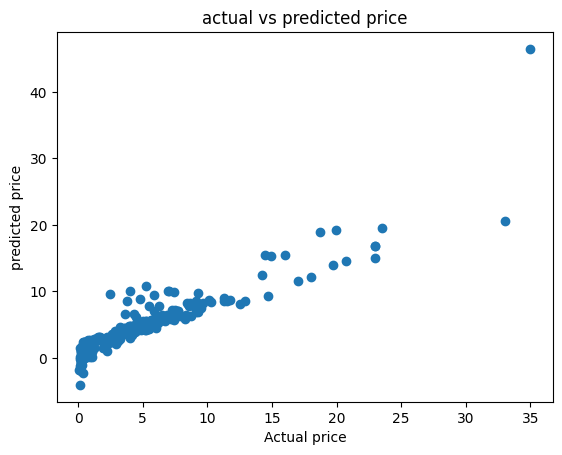

In [25]:
#visualisation with lasso model
plt.scatter(Y_train,pred_train_lasso)
plt.xlabel('Actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()

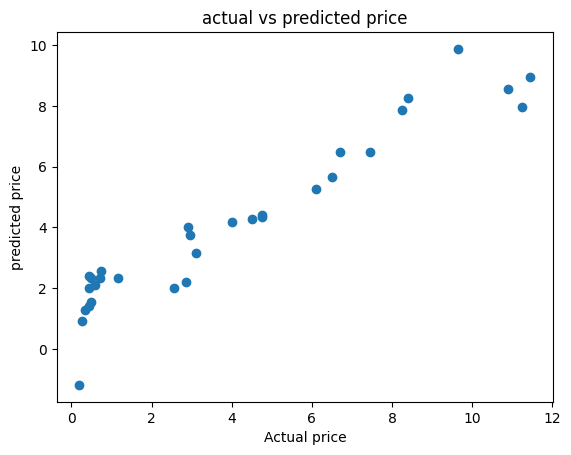

In [26]:
plt.scatter(Y_test,pred_test_lasso)
plt.xlabel('Actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.show()